# PHYS 434 - Lab 6

## Thomas K. Waters

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import random

plt.rcParams["figure.figsize"] = (20,15)

### Setup
Make a Poisson background with mean 100. 

In [2]:
bkgd = stats.poisson.rvs(mu = 100, size = 1000000)

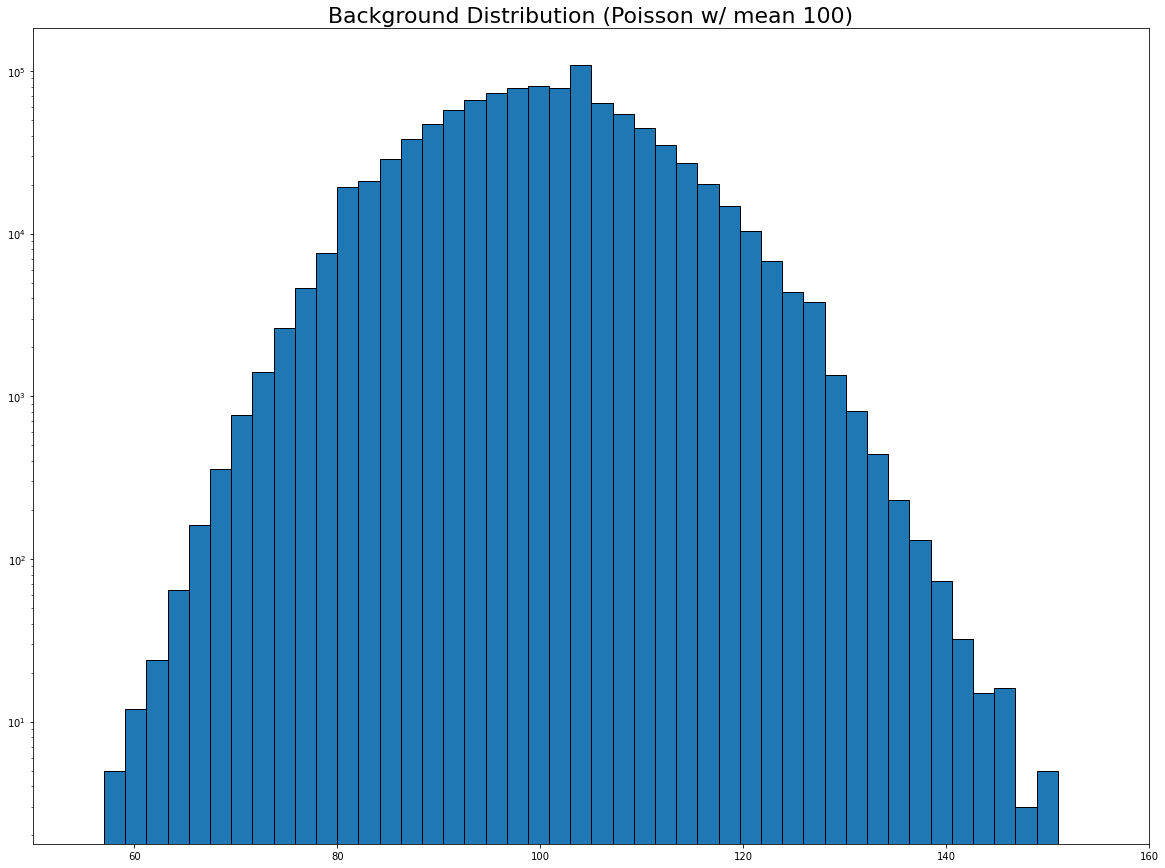

In [3]:
plt.hist(bkgd, bins = 45, edgecolor = 'black')
plt.title('Background Distribution (Poisson w/ mean 100)', size = 22)
plt.xlim(50,160)
plt.yscale('log');

### Problem 1
The first problem is to look at your background distribution and determine where the 5𝜎 sensitivity threshold is. [Hint, you've done this several times now, look back at the first few labs.]

In [4]:
fiveSig = stats.poisson.isf(1/(3.5e6), mu = 100)

In [5]:
print(f'The 5 sigma threshold for a Poisson distribution with a mean of 100 is {fiveSig}.')

The 5 sigma threshold for a Poisson distribution with a mean of 100 is 154.0.


### Problem 2
Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30𝜎 range. Inject this signal into your background data many times.

In [6]:
empty = np.zeros((1000000-1000))

In [7]:
signalarr = np.ones(1000)*200

In [8]:
signal = np.concatenate((empty, signalarr), axis = 0)

In [9]:
signal = sorted(signal, key=lambda k: random.random()) # randomizing the signal array

In [10]:
data = bkgd + signal

#### a) 
Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

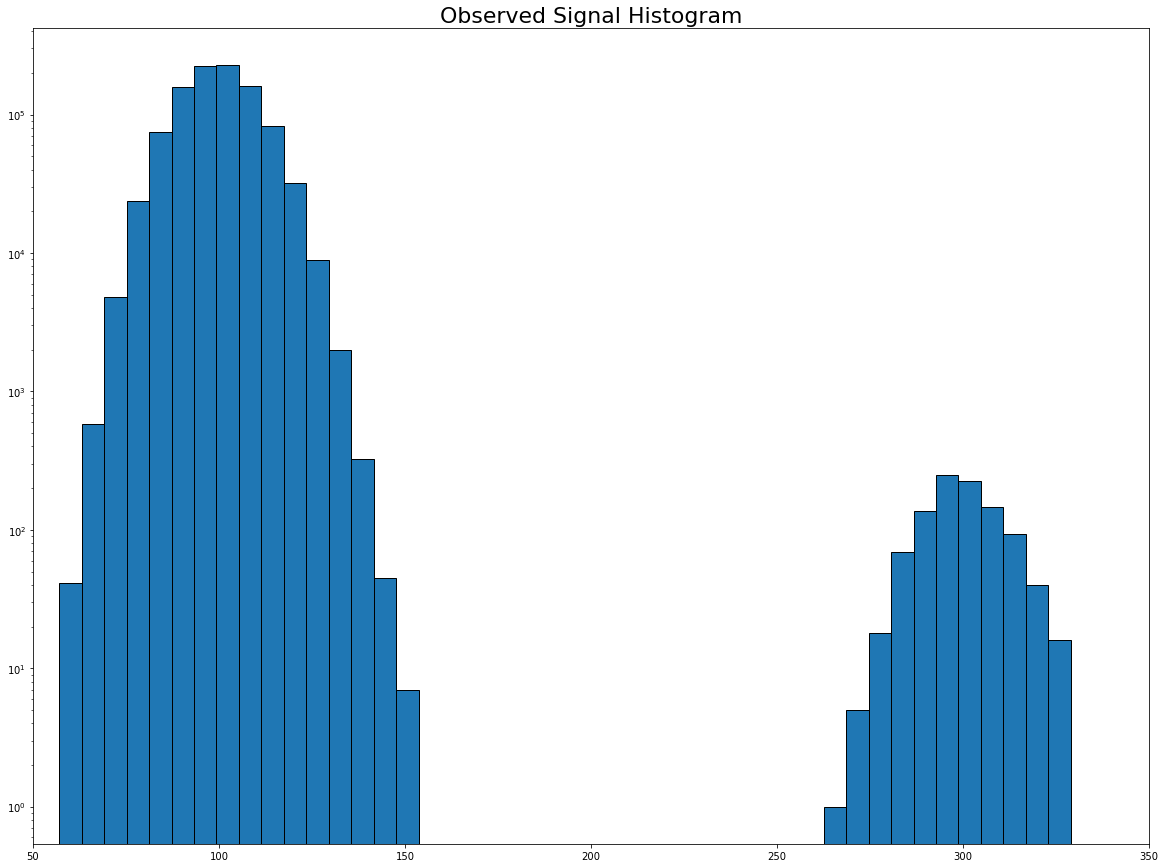

In [11]:
plt.hist(data, bins = 45, edgecolor = 'black')
plt.yscale('log')
plt.xlim(50,350)
plt.title('Observed Signal Histogram', size = 22);

### b) 
Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

The observed signal is biased. The mean of the observed values is approximately 300, which is greater than the injected signal of 200. To generate this plot, I created a randomized array with 1000 signals with a value of 200 and added that to the background Poisson distribution. Therefore, the observed signals will have a contribution from the background and will appear as a higher value on average than the injected signal. The distribution of the observed signals does not appear to be entirely symmetric, but this may be due to the fact that I generated my background distribution stats.poisson.rvs() so the resultant background is not a perfect Poisson distribution (we also may stull be under the mean threshold for the distribution to obey the central limit theorem). In addition, since the signal array is randomized, the signal will not necissarily be uniformly distributed throughout the injected array, so this may alter the symmetry of the observed signal distribution.

### Problem 3
Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5𝜎 (30𝜎 or more). You will want to follow the work you did for Homework 5 very closely.

### a) 
Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data


In this case, I will simulate the signals with a flat prior, meaning the injected signals follow a uniform distribution. I will then simulate those signals being measured with some background present by simply adding the background to the signals.

In [12]:
signals = stats.uniform.rvs(0, 400, 1000000)

''

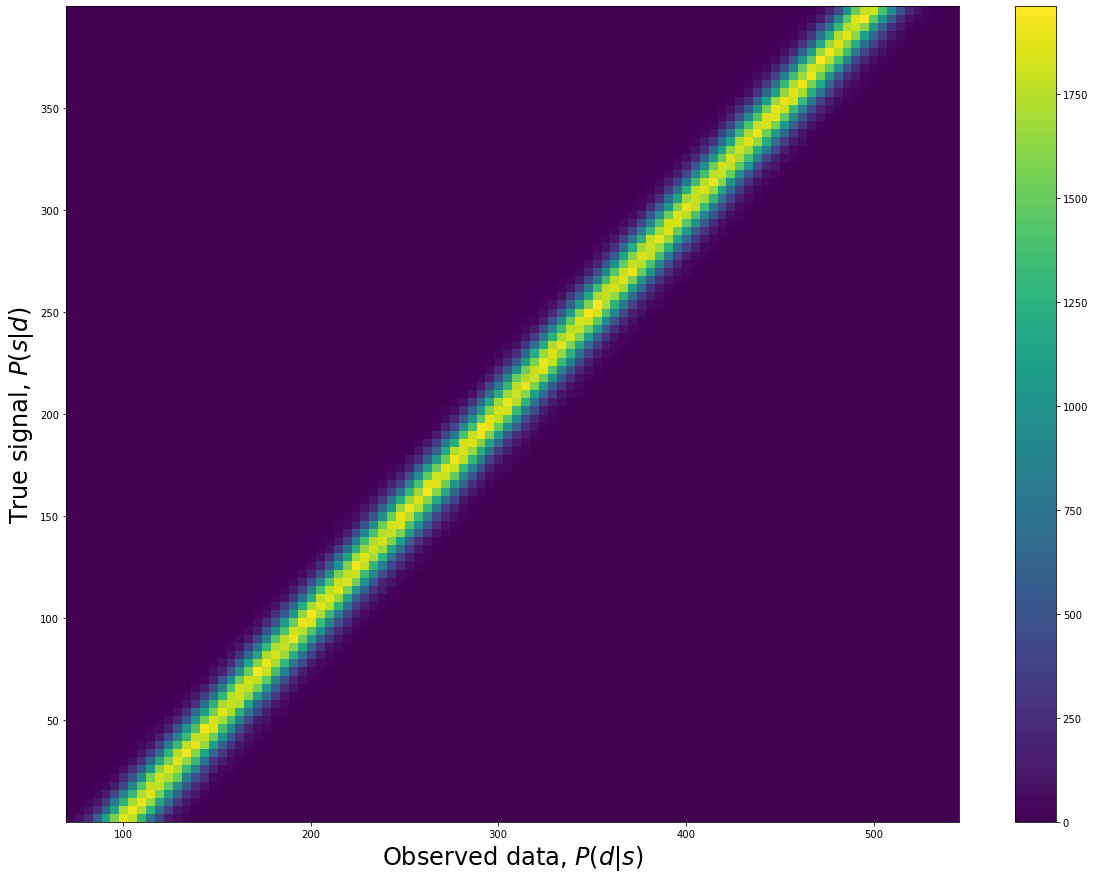

In [13]:
data2 = bkgd + signals

plt.hist2d(data2, signals, bins = (100,100))

signaledges = np.linspace(0,450,50)
dataedges = np.linspace(50,550,50)

Psd, temp, temp2 = np.histogram2d(data2, signals, bins=[dataedges,signaledges], density = True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
#plt.pcolormesh(datacenters, signalcenters, Psd.T, shading = 'auto') # This is messing up my bins for some reason
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

plt.colorbar()
;

### b) 
For the same injected signal power as in problem 2, show that you get the same answer.


In [14]:
criteria = (signaledges>199)*(signaledges<204)
idx = np.where(criteria)

In [15]:
idx

(array([22]),)

In [16]:
signaledges[22], signaledges[23]

(202.04081632653063, 211.22448979591837)

In [17]:
sigidx = np.where((signals > signaledges[22]) & (signals< signaledges[23]))

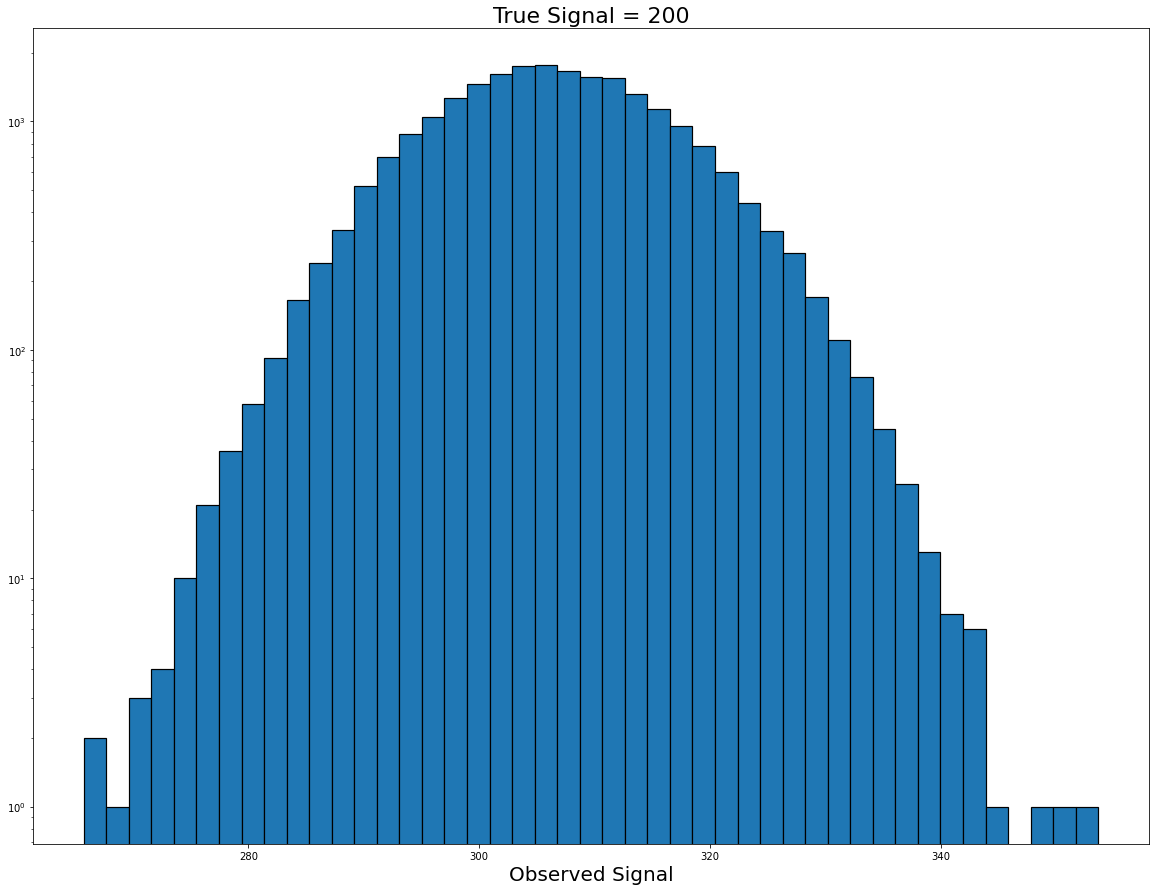

In [18]:
plt.hist(data2[sigidx], bins = 45, edgecolor = 'black', linewidth = 1.2)
plt.yscale('log')                                                       
plt.title('True Signal = 200', size = 22)
plt.xlabel('Observed Signal', size = 20);

This is consistent with the plot shown in #2a!

### c) 
Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5𝜎) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.


In [19]:
newsig = 160 #5 sigma measurement + 6

In [20]:
criteria2 = (signaledges>157)*(signaledges<166)
idxdat = np.where(criteria2)

In [21]:
idxdat

(array([18]),)

In [22]:
dataedges[18], dataedges[19]

(233.6734693877551, 243.87755102040816)

In [23]:
datidx = np.where((data2 > dataedges[18]) & (data2 < dataedges[19]))

Text(0.5, 0, 'True Signal')

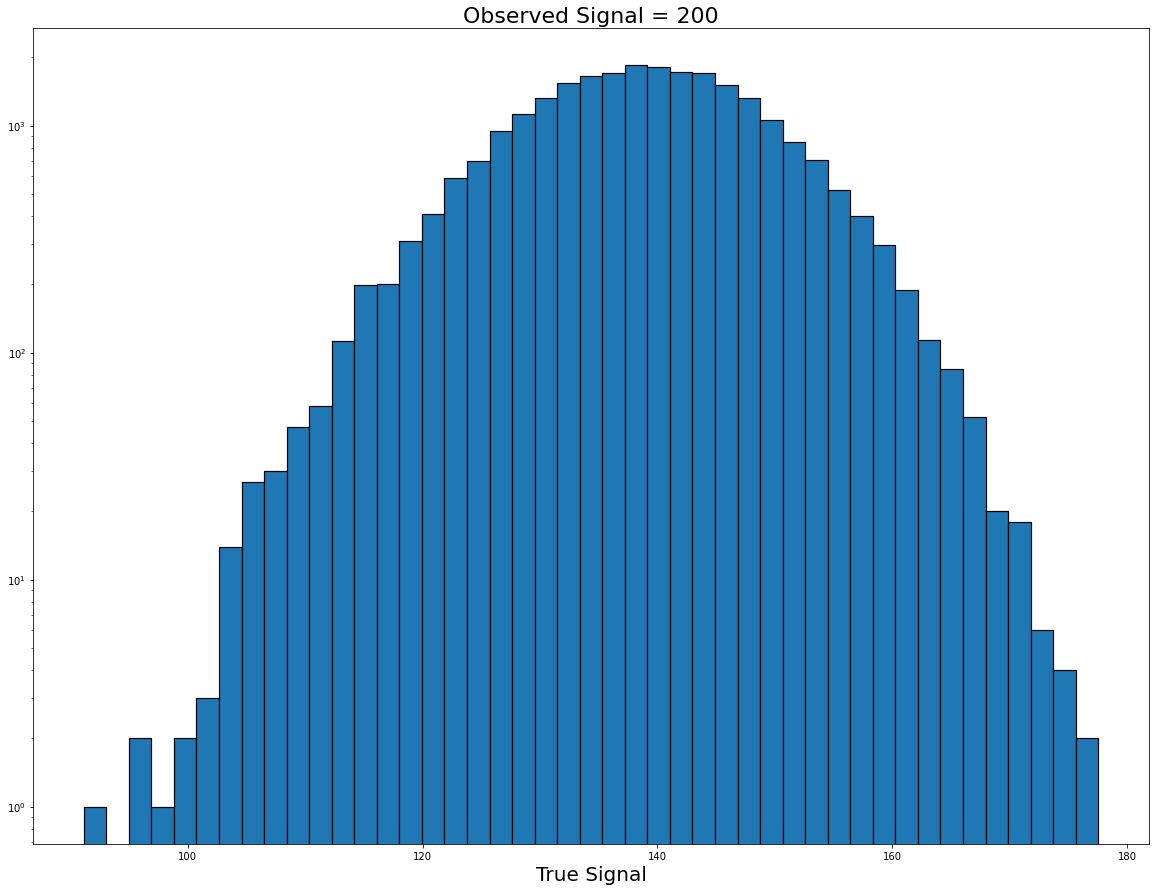

In [24]:
plt.hist(signals[datidx], bins = 45, edgecolor = 'black', linewidth = 1.2)
plt.yscale('log')
plt.title('Observed Signal = 200', size = 22)
plt.xlabel('True Signal', size = 20)

The above plot shows the distribution of potential true signals given an observed signal. This plot is consistent with the 2D histogram in #3a. 

### d) 
For your observed signal, what is the 1𝜎 uncertainty on the true signal strength?


In [25]:
mu = np.mean(signals[datidx])
oneSigProb_max = 0.68
oneSigProb_min = 1-0.68

In [26]:
uplim = stats.poisson.isf(oneSigProb_min, mu = mu)
lowlim = stats.poisson.isf(oneSigProb_max, mu = mu)

In [27]:
mu, uplim, lowlim

(138.79382443647512, 144.0, 133.0)

In [28]:
uplim-mu, mu-lowlim

(5.20617556352488, 5.79382443647512)

The expected value for the true signal measurement and its 1𝜎 uncertainties is ${138.8}^{+5.21}_{-5.79}$.

### e) 
Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?

The above value shows the expected value (the mean) of the true signal given an observed signal of 200 with the 1𝜎 uncertainties. The uncertainties are not symmetric as our  values are Poisson distributions. While the histograms do appear to be approximately Gaussian, we have not reached a sufficently high mean value for the Poisson distributions to obey the central limit theorem. Therefore, we will see some deviation between the value of the upper and lower 1𝜎 uncertainties. The upper and lower 1𝜎 uncertainties are only equal in symmetric distributions.